In [278]:
import pandas as pd
import json
import numpy as np
import os

In [3]:
#atribuição json a var churn
churn = pd.read_json('dados_json.json')

In [41]:
# head na variavel
churn.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [43]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  7344 non-null   object
 1   Churn       7344 non-null   object
 2   cliente     7344 non-null   object
 3   telefone    7344 non-null   object
 4   internet    7344 non-null   object
 5   conta       7344 non-null   object
dtypes: object(6)
memory usage: 344.4+ KB


In [35]:
# leitura do arquivo raiz json 
# Generalização do json para usar o normalize como um todo
with open('dados_json.json') as archive:
    dados_bruto = json.load(archive)

In [37]:
# normalizando todas as colunas do arquivo de uma vez
dados_normalizados = pd.json_normalize(dados_bruto)

In [39]:
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [45]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [73]:

dados_normalizados = dados_normalizados.rename(columns={
    'id_cliente': 'ID_cliente',
    'Churn': 'Churn',
    'cliente.genero': 'Genero',
    'cliente.idoso': 'Idoso',
    'cliente.parceiro': 'Parceiro',
    'cliente.dependentes': 'Dependentes',
    'cliente.tempo_servico': 'Meses_tempo_servico',
    'telefone.servico_telefone': 'Assinatura_servico_telefone',
    'telefone.varias_linhas': 'Varias_linhas',
    'internet.servico_internet': 'Provedor_internet',
    'internet.seguranca_online': 'Assinatura_adicional_seguranca',
    'internet.backup_online': 'Assinatura_adicional_backup',
    'internet.protecao_dispositivo': 'Assinatura_adicional_protecao',
    'internet.suporte_tecnico': 'Assinatura_suporte_tecnico',
    'internet.tv_streaming': 'Assinatura_tv',
    'internet.filmes_streaming': 'Assinatura_filmes',
    'conta.contrato':'Tipo_contrato',
    'conta.faturamente_eletronico':'Preferencia_fatura_online',
    'conta.metodo_pagamento':'Forma_pagamento',
    'conta.cobranca.mensal':'Total_servico_mes',
    'conta.cobranca.Total':'Total_gasto'
})

In [99]:
dados_normalizados.head()

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [77]:
# metodo info() retornou valores nulos coluna Total_gasto
dados_normalizados.loc[dados_normalizados['Total_gasto'] == ' ']

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


In [79]:
idx = dados_normalizados.loc[dados_normalizados['Total_gasto'] == ' '].index

In [89]:
dados_normalizados.loc[idx,['Meses_tempo_servico','Tipo_contrato','Total_servico_mes','Total_gasto']] 

,Meses_tempo_servico,Tipo_contrato,Total_servico_mes,Total_gasto
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [91]:
# verificado o o tipo do contrato -> tempo de contrato e foi verificado que são 2 anos (24)
# substituindo valores zerados da coluna meses_tempo_servico para 24 meses
dados_normalizados.loc[idx,['Meses_tempo_servico']] = 24

In [93]:
# validando substituição
dados_normalizados.loc[idx,['Meses_tempo_servico','Tipo_contrato','Total_servico_mes','Total_gasto']] 

,Meses_tempo_servico,Tipo_contrato,Total_servico_mes,Total_gasto
975,24.0,dois anos,56.05,
1775,24.0,dois anos,20.00,
1955,24.0,dois anos,61.90,
2075,24.0,dois anos,19.70,
2232,24.0,dois anos,20.25,
2308,24.0,dois anos,25.35,
2930,24.0,dois anos,73.35,
3134,24.0,dois anos,25.75,
3203,24.0,dois anos,52.55,
4169,24.0,dois anos,80.85,


In [95]:
# substituindo valores campo Total_gasto pala multiplicação da coluna Meses_tempo_servico pela Total_servico_mes
dados_normalizados.loc[idx,['Total_gasto']] = dados_normalizados['Meses_tempo_servico'] * dados_normalizados['Total_servico_mes']

In [97]:
# validando
dados_normalizados.loc[idx,['Meses_tempo_servico','Tipo_contrato','Total_servico_mes','Total_gasto']] 

,Meses_tempo_servico,Tipo_contrato,Total_servico_mes,Total_gasto
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [111]:
# casting da coluna total_gasto -> esta em str
dados_normalizados['Total_gasto'] =  dados_normalizados['Total_gasto'].astype(float)

In [113]:
 # validando
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_cliente                      7344 non-null   object 
 1   Churn                           7344 non-null   object 
 2   Genero                          7344 non-null   object 
 3   Idoso                           7344 non-null   int64  
 4   Parceiro                        7344 non-null   object 
 5   Dependentes                     7344 non-null   object 
 6   Meses_tempo_servico             7336 non-null   float64
 7   Assinatura_servico_telefone     7344 non-null   object 
 8   Varias_linhas                   7344 non-null   object 
 9   Provedor_internet               7344 non-null   object 
 10  Assinatura_adicional_seguranca  7344 non-null   object 
 11  Assinatura_adicional_backup     7344 non-null   object 
 12  Assinatura_adicional_protecao   73

In [123]:
# identificando valores unicos em cada coluna, para obter uma visão geral
for col in dados_normalizados.columns:
    print(f'Coluna: {col}')
    print(dados_normalizados[col].unique())
    print('-'*30)

Coluna: ID_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: Genero
['feminino' 'masculino']
------------------------------
Coluna: Idoso
[0 1]
------------------------------
Coluna: Parceiro
['sim' 'nao']
------------------------------
Coluna: Dependentes
['sim' 'nao']
------------------------------
Coluna: Meses_tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01 4.70e+01 6.20e+01
 4.60e+01 5.20e

In [127]:
# verificando valores vazios coluna churn
dados_normalizados.loc[dados_normalizados['Churn'] == '']

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [131]:
# separando um df sem dados vazios coluna churn
dados_sem_vazio = dados_normalizados.loc[dados_normalizados['Churn'] != ''].copy()

In [135]:
dados_sem_vazio

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [137]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_cliente                      7118 non-null   object 
 1   Churn                           7118 non-null   object 
 2   Genero                          7118 non-null   object 
 3   Idoso                           7118 non-null   int64  
 4   Parceiro                        7118 non-null   object 
 5   Dependentes                     7118 non-null   object 
 6   Meses_tempo_servico             7110 non-null   float64
 7   Assinatura_servico_telefone     7118 non-null   object 
 8   Varias_linhas                   7118 non-null   object 
 9   Provedor_internet               7118 non-null   object 
 10  Assinatura_adicional_seguranca  7118 non-null   object 
 11  Assinatura_adicional_backup     7118 non-null   object 
 12  Assinatura_adicional_protecao   7118 no

In [139]:
# verificado que os indices da minha df estão fora de sequencia correta
dados_sem_vazio.reset_index(drop=True,inplace=True)

In [141]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_cliente                      7118 non-null   object 
 1   Churn                           7118 non-null   object 
 2   Genero                          7118 non-null   object 
 3   Idoso                           7118 non-null   int64  
 4   Parceiro                        7118 non-null   object 
 5   Dependentes                     7118 non-null   object 
 6   Meses_tempo_servico             7110 non-null   float64
 7   Assinatura_servico_telefone     7118 non-null   object 
 8   Varias_linhas                   7118 non-null   object 
 9   Provedor_internet               7118 non-null   object 
 10  Assinatura_adicional_seguranca  7118 non-null   object 
 11  Assinatura_adicional_backup     7118 non-null   object 
 12  Assinatura_adicional_protecao   71

In [151]:
# verificando dados duplicados
filtro_duplicados = dados_sem_vazio.duplicated()

In [153]:
dados_sem_vazio.loc[filtro_duplicados]

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [155]:
# removendo dados duplicados
dados_sem_vazio.drop_duplicates(inplace=True)

In [159]:
#validando 
dados_sem_vazio.duplicated().sum()

0

In [163]:
# identificando dados nulos
dados_sem_vazio.isna().sum()

ID_cliente                         0
Churn                              0
Genero                             0
Idoso                              0
Parceiro                           0
Dependentes                        0
Meses_tempo_servico                8
Assinatura_servico_telefone        0
Varias_linhas                      0
Provedor_internet                  0
Assinatura_adicional_seguranca     0
Assinatura_adicional_backup        0
Assinatura_adicional_protecao      0
Assinatura_suporte_tecnico         0
Assinatura_tv                      0
Assinatura_filmes                  0
Tipo_contrato                     31
Preferencia_fatura_online         17
Forma_pagamento                   26
Total_servico_mes                 17
Total_gasto                       15
dtype: int64

In [167]:
## meses_tempo_servico estão nulos -> basta dividir coluna Total_gasto por Total_servico_mes
idx_meses_vazios = dados_sem_vazio.loc[dados_sem_vazio['Meses_tempo_servico'].isna()].index

In [171]:
dados_sem_vazio.loc[idx_meses_vazios,['Meses_tempo_servico','Total_servico_mes','Total_gasto']]

,Meses_tempo_servico,Total_servico_mes,Total_gasto
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [201]:
dados_sem_vazio.loc[idx_meses_vazios,['Meses_tempo_servico']] = np.ceil(dados_sem_vazio['Total_gasto'] / dados_sem_vazio['Total_servico_mes'])

In [203]:
# validando
dados_sem_vazio.loc[idx_meses_vazios]

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
9,0016-QLJIS,nao,feminino,0,sim,sim,66.0,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,13.0,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,5.0,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
751,1095-WGNGG,nao,feminino,0,sim,nao,60.0,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
3523,4994-OBRSZ,nao,masculino,0,nao,sim,14.0,sim,nao,DSL,...,sim,sim,sim,nao,sim,dois anos,nao,transferencia bancaria (automatica),76.10,1054.80
5273,7435-ZNUYY,nao,masculino,0,nao,nao,6.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,20.60,116.60
5276,7445-WMRBW,nao,feminino,0,nao,nao,49.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,um ano,sim,transferencia bancaria (automatica),73.85,3581.40
6134,8690-UPCZI,nao,masculino,0,sim,sim,29.0,sim,sim,DSL,...,nao,nao,sim,sim,nao,um ano,nao,transferencia bancaria (automatica),69.05,1958.45


In [205]:
dados_sem_vazio.isna().sum()

ID_cliente                         0
Churn                              0
Genero                             0
Idoso                              0
Parceiro                           0
Dependentes                        0
Meses_tempo_servico                0
Assinatura_servico_telefone        0
Varias_linhas                      0
Provedor_internet                  0
Assinatura_adicional_seguranca     0
Assinatura_adicional_backup        0
Assinatura_adicional_protecao      0
Assinatura_suporte_tecnico         0
Assinatura_tv                      0
Assinatura_filmes                  0
Tipo_contrato                     31
Preferencia_fatura_online         17
Forma_pagamento                   26
Total_servico_mes                 17
Total_gasto                       15
dtype: int64

In [211]:
# dropando dados nulos na coluna tipo_contrato
colunas_dropar = ['Tipo_contrato','Preferencia_fatura_online','Forma_pagamento']

In [217]:
df_sem_nulos = dados_sem_vazio.dropna(subset=colunas_dropar).copy()

In [219]:
df_sem_nulos.head()

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [221]:
df_sem_nulos.reset_index(drop=True,inplace=True)

In [223]:
df_sem_nulos.head()

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [225]:
df_sem_nulos.isna().sum()

ID_cliente                        0
Churn                             0
Genero                            0
Idoso                             0
Parceiro                          0
Dependentes                       0
Meses_tempo_servico               0
Assinatura_servico_telefone       0
Varias_linhas                     0
Provedor_internet                 0
Assinatura_adicional_seguranca    0
Assinatura_adicional_backup       0
Assinatura_adicional_protecao     0
Assinatura_suporte_tecnico        0
Assinatura_tv                     0
Assinatura_filmes                 0
Tipo_contrato                     0
Preferencia_fatura_online         0
Forma_pagamento                   0
Total_servico_mes                 0
Total_gasto                       0
dtype: int64

In [227]:
df_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_cliente                      7006 non-null   object 
 1   Churn                           7006 non-null   object 
 2   Genero                          7006 non-null   object 
 3   Idoso                           7006 non-null   int64  
 4   Parceiro                        7006 non-null   object 
 5   Dependentes                     7006 non-null   object 
 6   Meses_tempo_servico             7006 non-null   float64
 7   Assinatura_servico_telefone     7006 non-null   object 
 8   Varias_linhas                   7006 non-null   object 
 9   Provedor_internet               7006 non-null   object 
 10  Assinatura_adicional_seguranca  7006 non-null   object 
 11  Assinatura_adicional_backup     7006 non-null   object 
 12  Assinatura_adicional_protecao   70

In [268]:
# verificando valores outlier
df_sem_nulos.describe()

,Idoso,Meses_tempo_servico,Total_servico_mes,Total_gasto
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [231]:
# coluna meses_tempo_servico esta em meses -> no describe dessa coluna possuem 1080 meses ->  90 anos

In [233]:
import seaborn as sns

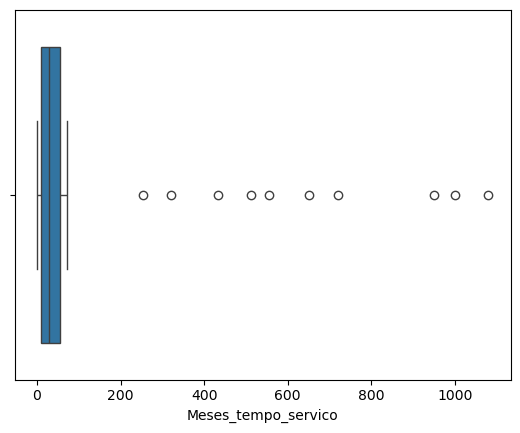

In [237]:
sns.boxplot(x=df_sem_nulos['Meses_tempo_servico']);

In [242]:
##### q1 = df_sem_nulos['Meses_tempo_servico'].quantile(.25)
q3 = df_sem_nulos['Meses_tempo_servico'].quantile(.75)
IQR = q3-q1
limite_inferior = q1-1.5*IQR
limite_superior = q3+1.5*IQR

In [248]:
outlier_index = (df_sem_nulos['Meses_tempo_servico'] < limite_inferior) | (df_sem_nulos['Meses_tempo_servico'] > limite_superior)

In [252]:
df_sem_nulos.loc[outlier_index,['Meses_tempo_servico']]

,Meses_tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


In [256]:
df_sem_outlier = df_sem_nulos.copy()

In [258]:
df_sem_outlier.head()

,ID_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_tempo_servico,Assinatura_servico_telefone,Varias_linhas,Provedor_internet,...,Assinatura_adicional_backup,Assinatura_adicional_protecao,Assinatura_suporte_tecnico,Assinatura_tv,Assinatura_filmes,Tipo_contrato,Preferencia_fatura_online,Forma_pagamento,Total_servico_mes,Total_gasto
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [260]:
df_sem_outlier.loc[outlier_index,['Meses_tempo_servico']] = np.ceil(df_sem_outlier.loc[outlier_index,['Total_gasto']] / df_sem_outlier.loc[outlier_index,['Total_servico_mes']])

<Axes: xlabel='Meses_tempo_servico'>

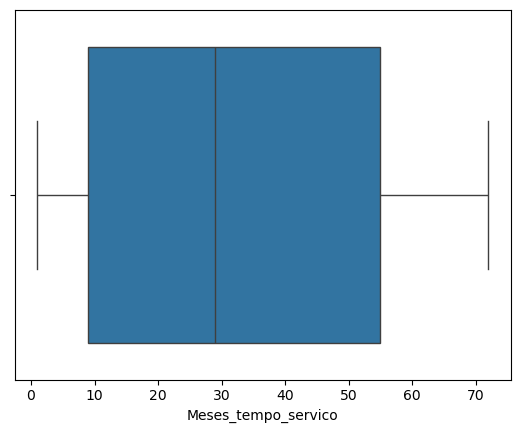

In [266]:
sns.boxplot(x=df_sem_outlier['Meses_tempo_servico'])

In [270]:
df_sem_outlier.describe()

,Idoso,Meses_tempo_servico,Total_servico_mes,Total_gasto
count,7006.000000,6996.000000,7006.000000,7006.000000
mean,0.162004,32.408090,64.720361,2317.743862
std,0.368481,24.540366,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,55.000000,89.850000,3783.600000
max,1.000000,72.000000,118.750000,112212.000000


In [272]:
pwd

'C:\\Users\\Mateus\\Desktop\\ProjetosPython'

In [280]:
os.chdir('C:\\Users\\Mateus\\Desktop\\ProjetosPython\\Staging')

In [284]:
pwd

'C:\\Users\\Mateus\\Desktop\\ProjetosPython\\Staging'

In [286]:
df_sem_outlier.to_csv('Churn_staging.csv',index=False)